In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# DATA PATH
TRAIN_DATA_PATH = os.path.join("..","datasets","processed","train.csv")
TEST_DATA_PATH = os.path.join("..","datasets","processed","test.csv")

In [3]:
train = pd.read_csv(TRAIN_DATA_PATH, parse_dates=['Month'], index_col='Month', squeeze=True)
test = pd.read_csv(TEST_DATA_PATH, parse_dates=['Month'], index_col='Month', squeeze=True)

### Datos

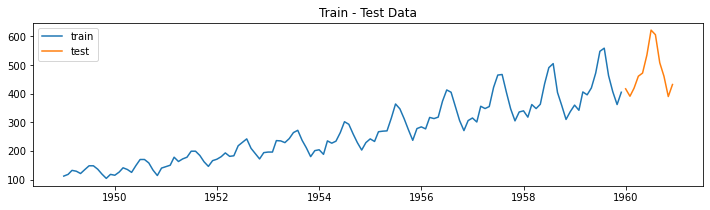

In [4]:
plt.figure(figsize=(12,3))
plt.title("Train - Test Data")
plt.plot(train)
plt.plot(test)
plt.legend(['train','test'])
plt.show()

## Aplicando Diferenciación

In [5]:
%run ../auxiliar_functions/tsTransformer.py

X = train.values
stationary = difference(X)
stationary.index = train.index[2:]
stationary

Month
1949-03-01    0.059932
1949-04-01   -0.135107
1949-05-01   -0.041032
1949-06-01    0.173506
1949-07-01   -0.017547
                ...   
1959-08-01   -0.129422
1959-09-01   -0.208297
1959-10-01    0.059509
1959-11-01    0.011745
1959-12-01    0.229412
Length: 130, dtype: float64

In [6]:
len(train.index[2:])

130

## Modelo

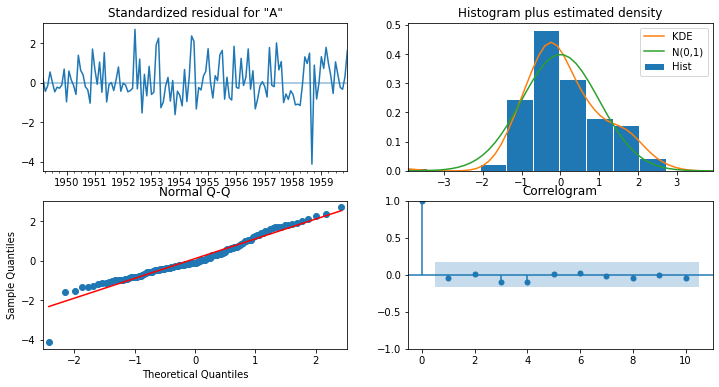

In [7]:
model = ARIMA(train, order=(12,2,15))
model_fit = model.fit()

model_fit.plot_diagnostics(figsize=(12, 6))
plt.show()

### Modelo Guardado

In [8]:
# Guardo el modelo
model_fit.save('../arima_model.pkl')

### Pronóstico

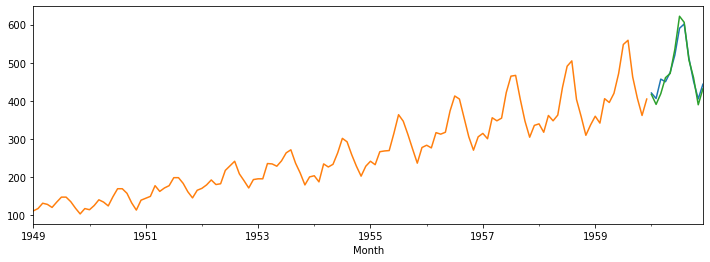

In [37]:
# Carga del modelo
arima_model = ARIMAResults.load('../arima_model.pkl')

# Pronóstico - 12 meses
pred = arima_model.get_forecast(steps=12) # Forecast
conf_int = pred.conf_int() # Confidence Interval

# Visualización
plt.figure(figsize=(12,4))
pred.predicted_mean.plot()
train.plot()
test.plot()
plt.show()

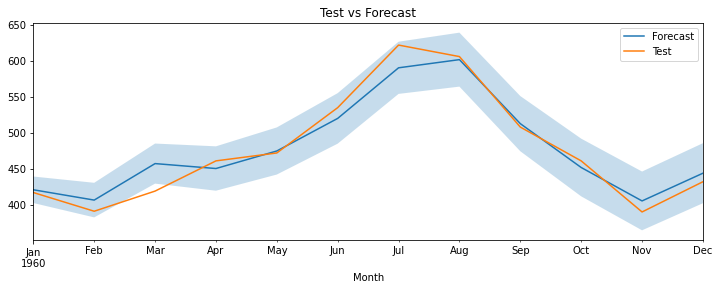

In [36]:
# Test vs Forecast
plt.figure(figsize=(12,4))
plt.title('Test vs Forecast')
pred.predicted_mean.plot()
test.plot()
plt.fill_between(conf_int.index, conf_int['lower AirPassengers'], conf_int['upper AirPassengers'], alpha=.25)
plt.legend(['Forecast', 'Test'])
plt.show()

In [12]:
%run ../auxiliar_functions/forecast_accuracy.py

forecast_accuracy(test, pred.predicted_mean)

,Scores
MAE,13.57
MSE,296.67
MAPE,0.03
RMSE,17.22
